In [1]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [2]:
from strategies.CNN import CNNStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data_handler = DataHandler(ticker='AAPL', start_date='2020-01-01', end_date='2024-01-01')
data = data_handler.fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



### CNN

Chapter 4: repeat Chapter 3 but using a CNN approach – do you 
use CNN alone or combine it with an RNN

#### Prices

c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


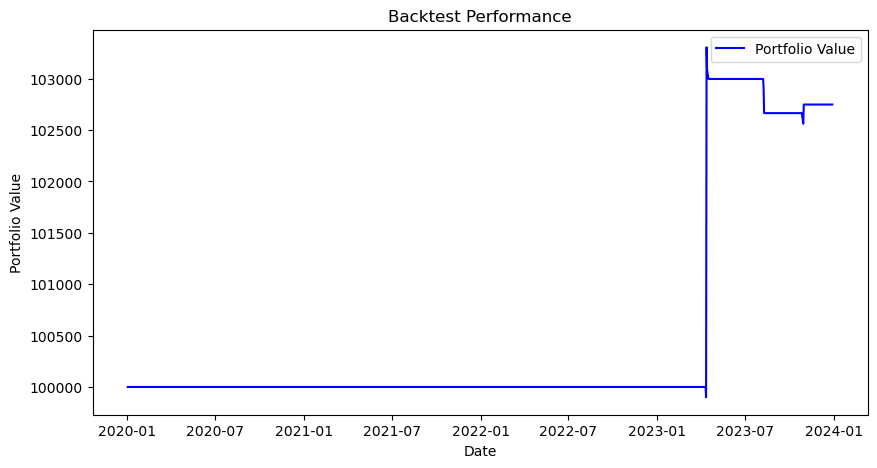

{'Final Value': 102747.86293649295, 'Return': 0.02747862936492962, 'Sharpe Ratio': 0.40394432974222705, 'Max Drawdown': -0.007199736506213861}


In [4]:
CNN_strategy = CNNStrategy(n_steps_ahead=1, target_type='price')
backtest_CNN = Backtest(data, CNN_strategy)
results_CNN = backtest_CNN.run()
print(results_CNN)

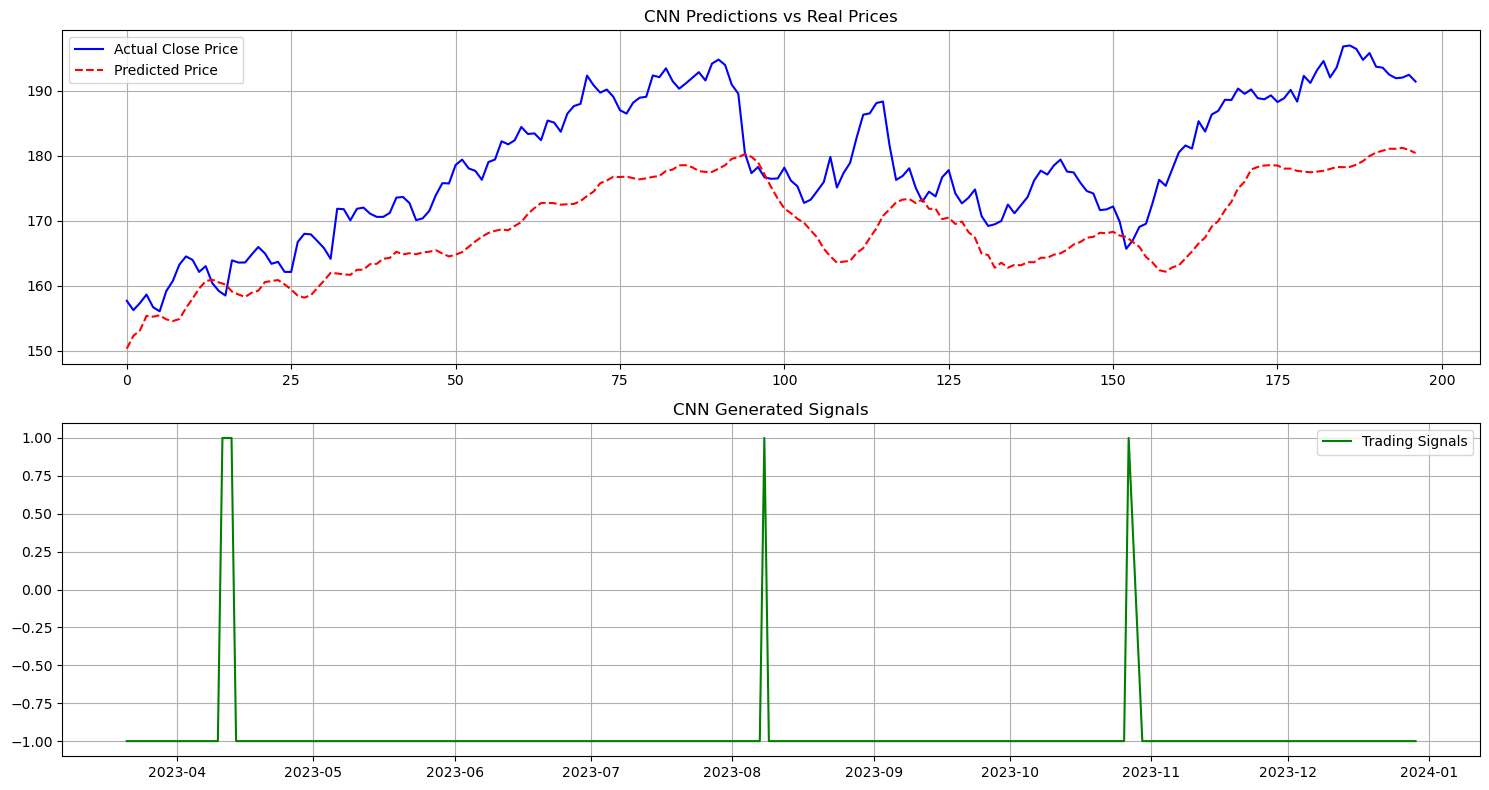


 CNN Strategy Statistics:
Number of trades: 197
Signal distribution:
 0    809
-1    192
 1      5
Name: count, dtype: int64

 Prediction statistics:
Mean predicted price: 168.822342
Std predicted price: 7.310910

 MSE (Mean Squared Error): 119.529046

 R²: -0.10


In [5]:
# Récupérer les vrais prix de clôture alignés avec y_test
window_size = CNN_strategy.window_size
test_size = len(CNN_strategy.y_test)  # correspond à y_pred aussi
total_seq = len(CNN_strategy.signals) - window_size  # nombre total de y_seq

# Indices des vrais prix correspondant à y_test
real_prices = data['Close'].iloc[window_size + total_seq - test_size : window_size + total_seq].values

# Vérification de la correspondance
assert len(real_prices) == test_size, "Real prices and predictions are not aligned!"

# Tracer les prix réels vs prédictions
plt.figure(figsize=(15, 8))

# Plot 1: Prix réels vs prédictions
plt.subplot(2, 1, 1)
plt.plot(real_prices, label='Actual Close Price', color='blue')
plt.plot(CNN_strategy.y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('CNN Predictions vs Real Prices')
plt.legend()
plt.grid(True)

# Plot 2: Signaux de trading
plt.subplot(2, 1, 2)
plt.plot(CNN_strategy.signals.iloc[-test_size:], label='Trading Signals', color='green')
plt.title('CNN Generated Signals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistiques
print("\n CNN Strategy Statistics:")
print(f"Number of trades: {(CNN_strategy.signals != 0).sum()}")
print(f"Signal distribution:\n{CNN_strategy.signals.value_counts()}")
print("\n Prediction statistics:")
print(f"Mean predicted price: {CNN_strategy.y_pred.mean():.6f}")
print(f"Std predicted price: {CNN_strategy.y_pred.std():.6f}")

# MSE entre prix réels et prédits
mse = mean_squared_error(real_prices, CNN_strategy.y_pred)
print(f"\n MSE (Mean Squared Error): {mse:.6f}")
print(f"\n R²: {r2_score(real_prices, CNN_strategy.y_pred):.2f}")

#### Multiperiod forecasting

c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


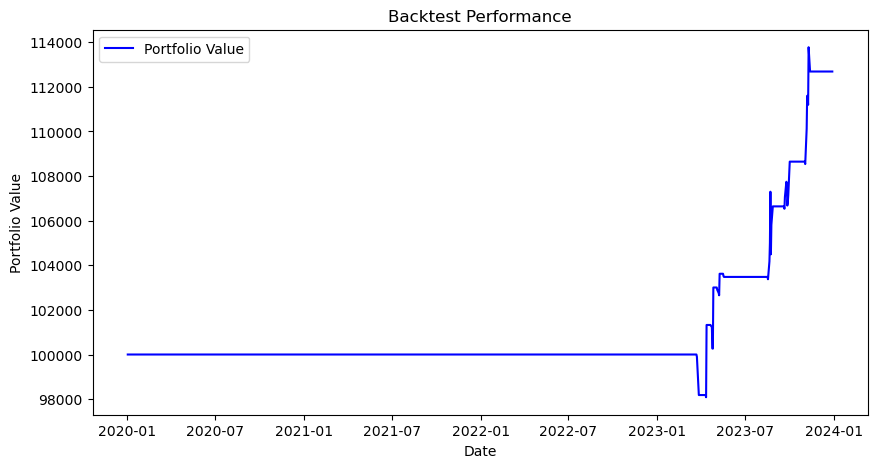

{'Final Value': 112686.77320217909, 'Return': 0.1268677320217908, 'Sharpe Ratio': 0.8574822583485497, 'Max Drawdown': -0.026137490222731596}


In [6]:
# CNN for 5 steps ahead
CNN_5_strategy = CNNStrategy(n_steps_ahead=5)
backtest_CNN_5 = Backtest(data, CNN_5_strategy)
results_CNN_5 = backtest_CNN_5.run()
print(results_CNN_5)

Training for 2-step ahead forecasting...


c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MSE (horizon 2): 88.9191
R² (horizon 2): 0.1917
Training for 5-step ahead forecasting...


c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MSE (horizon 5): 116.2999
R² (horizon 5): -0.0255
Training for 10-step ahead forecasting...


c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MSE (horizon 10): 194.3656
R² (horizon 10): -0.6508


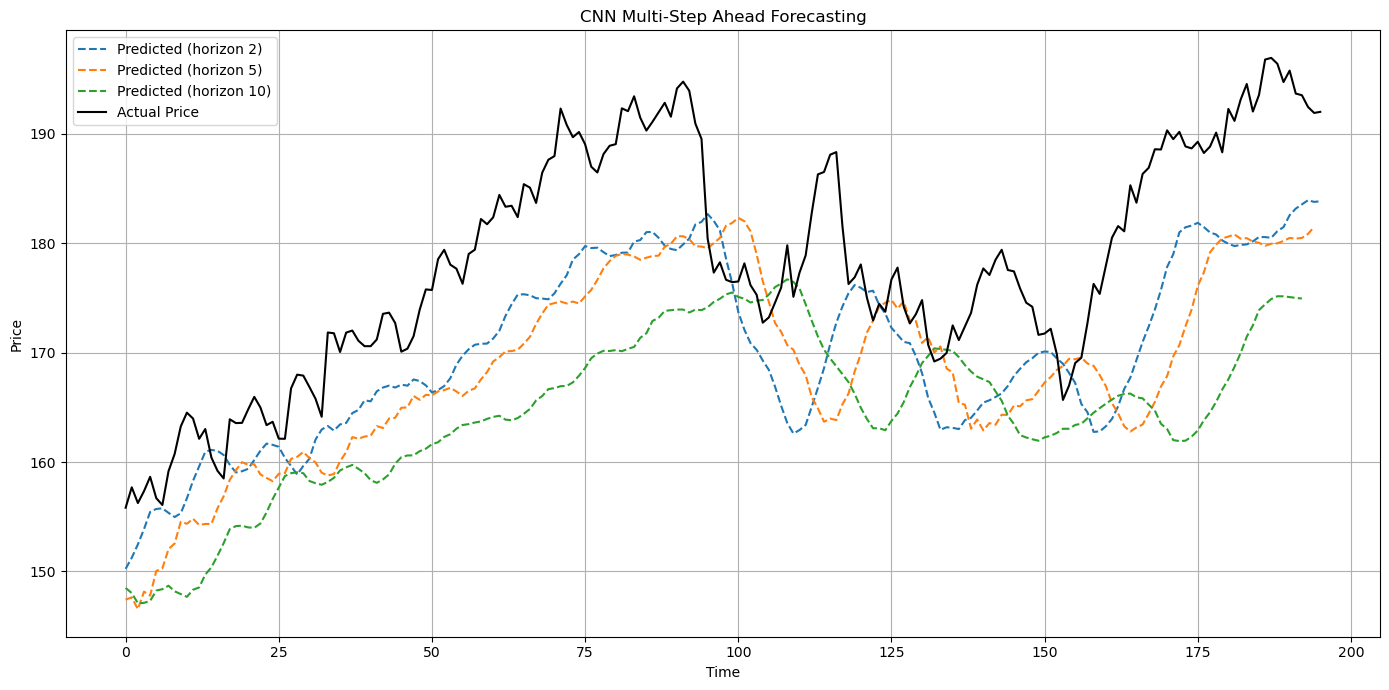

In [7]:
# Paramètres
steps_list = [2, 5, 10]

# Dictionnaires pour stocker les prédictions
predictions = {}
actuals = {}
mses = {}
R_2 = {}

# Boucle sur plusieurs horizons
for steps in steps_list:
    print(f"Training for {steps}-step ahead forecasting...")

    # Initier la stratégie LSTM avec horizon souhaité
    strategy = CNNStrategy(n_steps_ahead=steps)

    # Générer les signaux et obtenir les prédictions
    strategy.generate_signals(data)

    # Stocker les prédictions (moyenne sur n_steps)
    y_pred_mean = strategy.y_pred.mean(axis=1)
    y_test_last = strategy.y_test[:, -1]  # Dernier vrai prix pour comparaison

    predictions[steps] = y_pred_mean
    actuals[steps] = y_test_last

    # Calcul du MSE et R²
    mse = mean_squared_error(y_test_last, y_pred_mean)
    mses[steps] = mse
    R_2[steps] = r2_score(y_test_last, y_pred_mean)
    print(f"MSE (horizon {steps}): {mse:.4f}")
    print(f"R² (horizon {steps}): {R_2[steps]:.4f}")

# Plot des prédictions
plt.figure(figsize=(14, 7))
for steps in steps_list:
    plt.plot(predictions[steps], label=f'Predicted (horizon {steps})', linestyle='--')
plt.plot(actuals[steps_list[0]], label='Actual Price', color='black')
plt.title('CNN Multi-Step Ahead Forecasting')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Returns prediction

c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


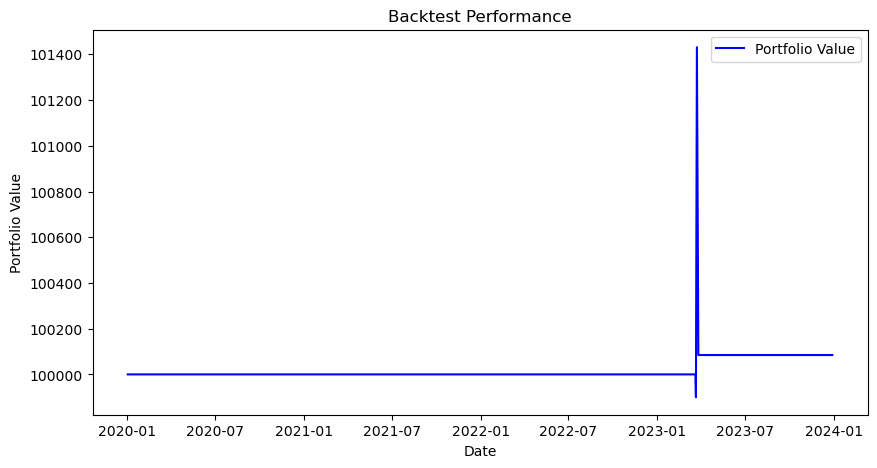

{'Final Value': 100084.71361923219, 'Return': 0.0008471361923219067, 'Sharpe Ratio': 0.029014805919600352, 'Max Drawdown': -0.013273972117534671}


In [8]:
CNN_strategy_r = CNNStrategy(n_steps_ahead=1, target_type='return')
backtest_CNN_r = Backtest(data, CNN_strategy_r)
results_CNN_r = backtest_CNN_r.run()
print(results_CNN_r)

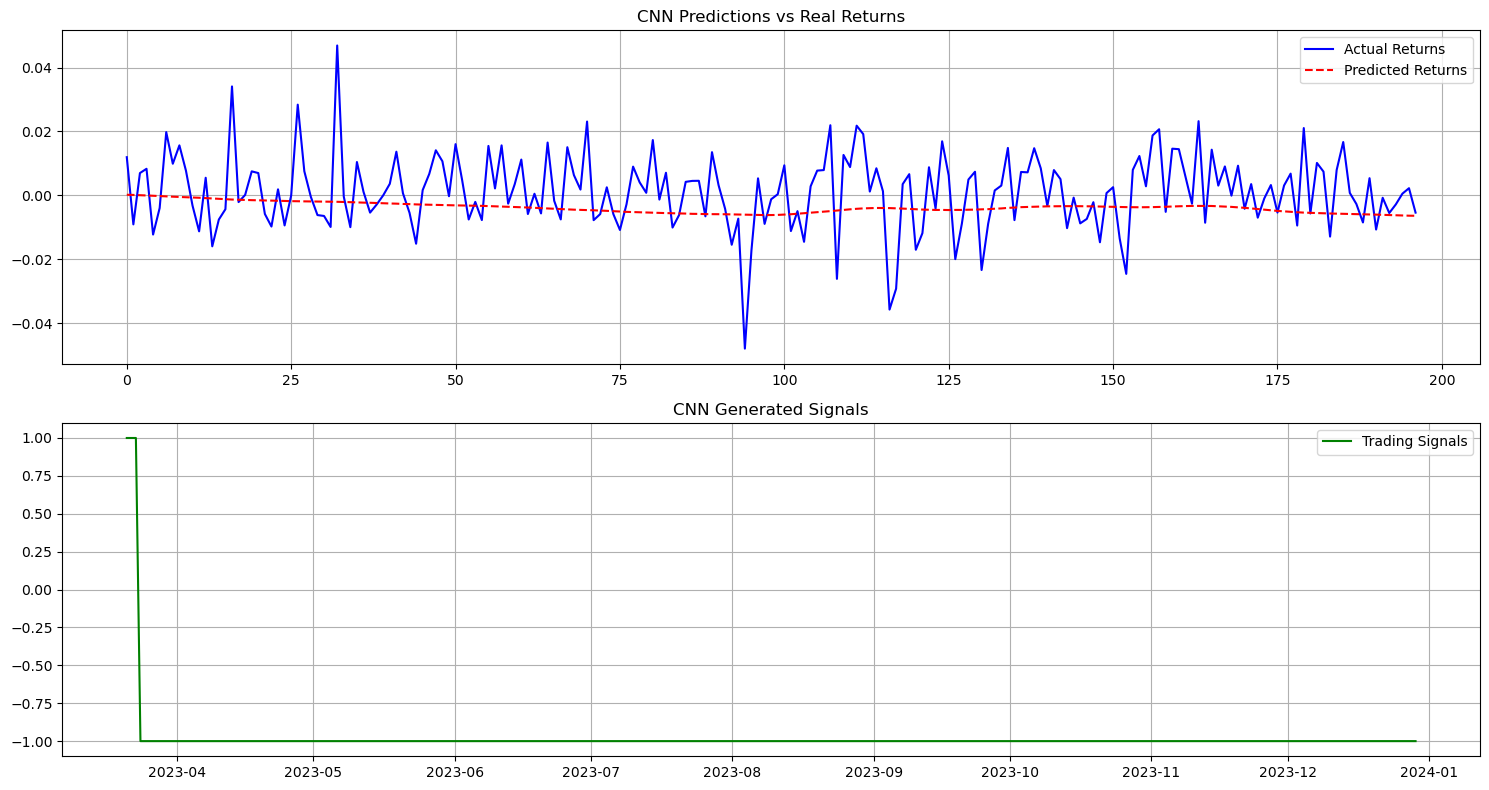


 CNN Strategy Statistics:
Number of trades: 197
Signal distribution:
 0    809
-1    194
 1      3
Name: count, dtype: int64

 Prediction statistics:
Mean predicted return: -0.003849
Std predicted return: 0.001617

 MSE (Mean Squared Error): 0.000160

 R²: -0.16


In [9]:
# Récupérer les returns de clôture alignés avec y_test
window_size = CNN_strategy_r.window_size
test_size = len(CNN_strategy_r.y_test)  # correspond à y_pred aussi
total_seq = len(CNN_strategy_r.signals) - window_size  # nombre total de y_seq

# Indices des vrais returns correspondant à y_test
real_returns = data['Close'].pct_change().iloc[-test_size:].values

# Vérification de la correspondance
assert len(real_returns) == test_size, "Real returns and predictions are not aligned!"

# Tracer les returns réels vs prédictions
plt.figure(figsize=(15, 8))

# Plot 1: Returns réels vs prédictions
plt.subplot(2, 1, 1)
plt.plot(real_returns, label='Actual Returns', color='blue')
plt.plot(CNN_strategy_r.y_pred, label='Predicted Returns', color='red', linestyle='--')
plt.title('CNN Predictions vs Real Returns')
plt.legend()
plt.grid(True)

# Plot 2: Signaux de trading
plt.subplot(2, 1, 2)
plt.plot(CNN_strategy_r.signals.iloc[-test_size:], label='Trading Signals', color='green')
plt.title('CNN Generated Signals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistiques
print("\n CNN Strategy Statistics:")
print(f"Number of trades: {(CNN_strategy_r.signals != 0).sum()}")
print(f"Signal distribution:\n{CNN_strategy_r.signals.value_counts()}")
print("\n Prediction statistics:")
print(f"Mean predicted return: {CNN_strategy_r.y_pred.mean():.6f}")
print(f"Std predicted return: {CNN_strategy_r.y_pred.std():.6f}")

# MSE et R² entre returns réels et prédits
mse = mean_squared_error(real_returns, CNN_strategy_r.y_pred)
print(f"\n MSE (Mean Squared Error): {mse:.6f}")
print(f"\n R²: {r2_score(real_returns, CNN_strategy_r.y_pred):.2f}")
